In [1]:
import random
from typing import List

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

1-2 пункт

In [2]:
df = pd.read_csv('paths.csv', delimiter=',', usecols = (0, 2), names = ('AbsPath', 'Name'))

3 пункт

In [3]:
df.head()

,AbsPath,Name
0,C:\Users\nikku\Desktop\3labpy\dataset2\rose_00...,rose
1,C:\Users\nikku\Desktop\3labpy\dataset2\rose_00...,rose
2,C:\Users\nikku\Desktop\3labpy\dataset2\rose_00...,rose
3,C:\Users\nikku\Desktop\3labpy\dataset2\rose_00...,rose
4,C:\Users\nikku\Desktop\3labpy\dataset2\rose_00...,rose


In [4]:
df['Class'] = df['Name'].apply(lambda name: 0 if name == 'rose' else 1)

In [5]:
df.head()

,AbsPath,Name,Class
0,C:\Users\nikku\Desktop\3labpy\dataset2\rose_00...,rose,0
1,C:\Users\nikku\Desktop\3labpy\dataset2\rose_00...,rose,0
2,C:\Users\nikku\Desktop\3labpy\dataset2\rose_00...,rose,0
3,C:\Users\nikku\Desktop\3labpy\dataset2\rose_00...,rose,0
4,C:\Users\nikku\Desktop\3labpy\dataset2\rose_00...,rose,0


4 пункт

In [6]:
df['Height'] = df['AbsPath'].apply(lambda path: cv2.imread(path).shape[0])

In [7]:
df['Width'] = df['AbsPath'].apply(lambda path: cv2.imread(path).shape[1])

In [8]:
df['Channel'] = df['AbsPath'].apply(lambda path: cv2.imread(path).shape[2])

In [9]:
df.head()

,AbsPath,Name,Class,Height,Width,Channel
0,C:\Users\nikku\Desktop\3labpy\dataset2\rose_00...,rose,0,1600,2400,3
1,C:\Users\nikku\Desktop\3labpy\dataset2\rose_00...,rose,0,1125,1500,3
2,C:\Users\nikku\Desktop\3labpy\dataset2\rose_00...,rose,0,1200,1920,3
3,C:\Users\nikku\Desktop\3labpy\dataset2\rose_00...,rose,0,1397,2048,3
4,C:\Users\nikku\Desktop\3labpy\dataset2\rose_00...,rose,0,1200,1920,3


5 пункт

In [10]:
df[df['Class'] == 0]['Height'].describe()

count    1000.00000
mean     1422.81600
std       631.36941
min       318.00000
25%      1080.00000
50%      1200.00000
75%      1704.50000
max      7498.00000
Name: Height, dtype: float64

In [11]:
df[df['Class'] == 1]['Height'].describe()

count    1000.000000
mean     1383.059000
std       528.106992
min       157.000000
25%      1024.000000
50%      1276.000000
75%      1800.000000
max      5358.000000
Name: Height, dtype: float64

In [12]:
df[df['Class'] == 0]['Width'].describe()

count    1000.000000
mean     1967.116000
std       780.632456
min       331.000000
25%      1366.000000
50%      1920.000000
75%      2560.000000
max      8000.000000
Name: Width, dtype: float64

In [13]:
df[df['Class'] == 1]['Width'].describe()

count    1000.000000
mean     1946.460000
std       779.850468
min       308.000000
25%      1280.000000
50%      1920.000000
75%      2560.000000
max      5184.000000
Name: Width, dtype: float64

In [14]:
df[df['Class'] == 0]['Channel'].describe()

count    1000.0
mean        3.0
std         0.0
min         3.0
25%         3.0
50%         3.0
75%         3.0
max         3.0
Name: Channel, dtype: float64

In [15]:
df[df['Class'] == 1]['Channel'].describe()

count    1000.0
mean        3.0
std         0.0
min         3.0
25%         3.0
50%         3.0
75%         3.0
max         3.0
Name: Channel, dtype: float64

6 пункт

In [16]:
def split_class(data: pd.DataFrame, class_name: int) -> pd.DataFrame:
    """
    Возвращает датафрейм, состоящий из строк, для которых значение метки соответствует заданному
    parameters

    data: pd.DataFrame
      Исходный датафрейм
    class_name : int
      Метка класса
    returns
   
    pd.Dataframe
    Отфильтрованный датафрейм
    """
    new_data = data[data['Class'] == class_name]
    new_data.reset_index(drop=True, inplace=True)
    return new_data

In [17]:
df_0 = split_class(df, 0) 
df_1 = split_class(df, 1)

In [18]:
df_1['Class'].unique()

array([1], dtype=int64)

7 пункт

In [19]:
def split_shape(data: pd.DataFrame, class_name: int, max_height: int, max_width: int) -> pd.DataFrame:
    """
    Возвращает датафрейм, отфильтрованный по заданным параметрам
    parameters
    
    data: pd.DataFrame
      Исходный датафрейм
    class_name : int
      Метка класса
    max_height: int
      Верхняя граница диапазона для высоты
    max_width: int
      Верхняя граница диапазона для ширины
    returns
   
    pd.Dataframe
    Отфильтрованный датафрейм
    """
    new_data = data[(data['Class'] == class_name) & (data['Height'] <= max_height) & (data['Width'] <= max_width)]
    new_data.reset_index(drop=True, inplace=True)
    return new_data

In [20]:
df_0_filter = split_shape(df, 0, 1100, 1400)

In [21]:
df_0_filter['Width'].max()

1400

8 пункт

In [22]:
df['Pixels'] = df['Height'] * df['Width'] * df['Channel']

In [23]:
df.head()

,AbsPath,Name,Class,Height,Width,Channel,Pixels
0,C:\Users\nikku\Desktop\3labpy\dataset2\rose_00...,rose,0,1600,2400,3,11520000
1,C:\Users\nikku\Desktop\3labpy\dataset2\rose_00...,rose,0,1125,1500,3,5062500
2,C:\Users\nikku\Desktop\3labpy\dataset2\rose_00...,rose,0,1200,1920,3,6912000
3,C:\Users\nikku\Desktop\3labpy\dataset2\rose_00...,rose,0,1397,2048,3,8583168
4,C:\Users\nikku\Desktop\3labpy\dataset2\rose_00...,rose,0,1200,1920,3,6912000


In [24]:
for class_name, sub_df in df.groupby("Class"):
    print(f'Class: {class_name}')
    print(f'Max: {sub_df.Pixels.max()}')
    print(f'Min: {sub_df.Pixels.min()}')
    print(f'Mean: {round(sub_df.Pixels.mean(), 2)}')
    print('-----------------------------')


Class: 0
Max: 179952000
Min: 317760
Mean: 9615062.17
-----------------------------
Class: 1
Max: 77428458
Min: 226080
Mean: 9086029.06
-----------------------------


9 пункт

In [25]:
def get_gists(data: pd.DataFrame, class_name: int) -> (List[np.ndarray], np.ndarray):
    """
    Возвращает список из массивов значений гистограммы по каждому каналу и изображение
    parameters
    
    data: pd.DataFrame
      Исходный датафрейм
    class_name : int
      Метка класса
    returns
    
    list[np.ndarray]
    Список векторов numpy
    image
    Изображение
    """
    class_data = split_class(data, class_name)
    image = cv2.imread(class_data['AbsPath'][random.randint(0, len(class_data) - 1)])
    hists = []
    for i in range(1 if len(image.shape) == 2 else image.shape[2]):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        hists.append(hist)
    return hists, image

10 пункт

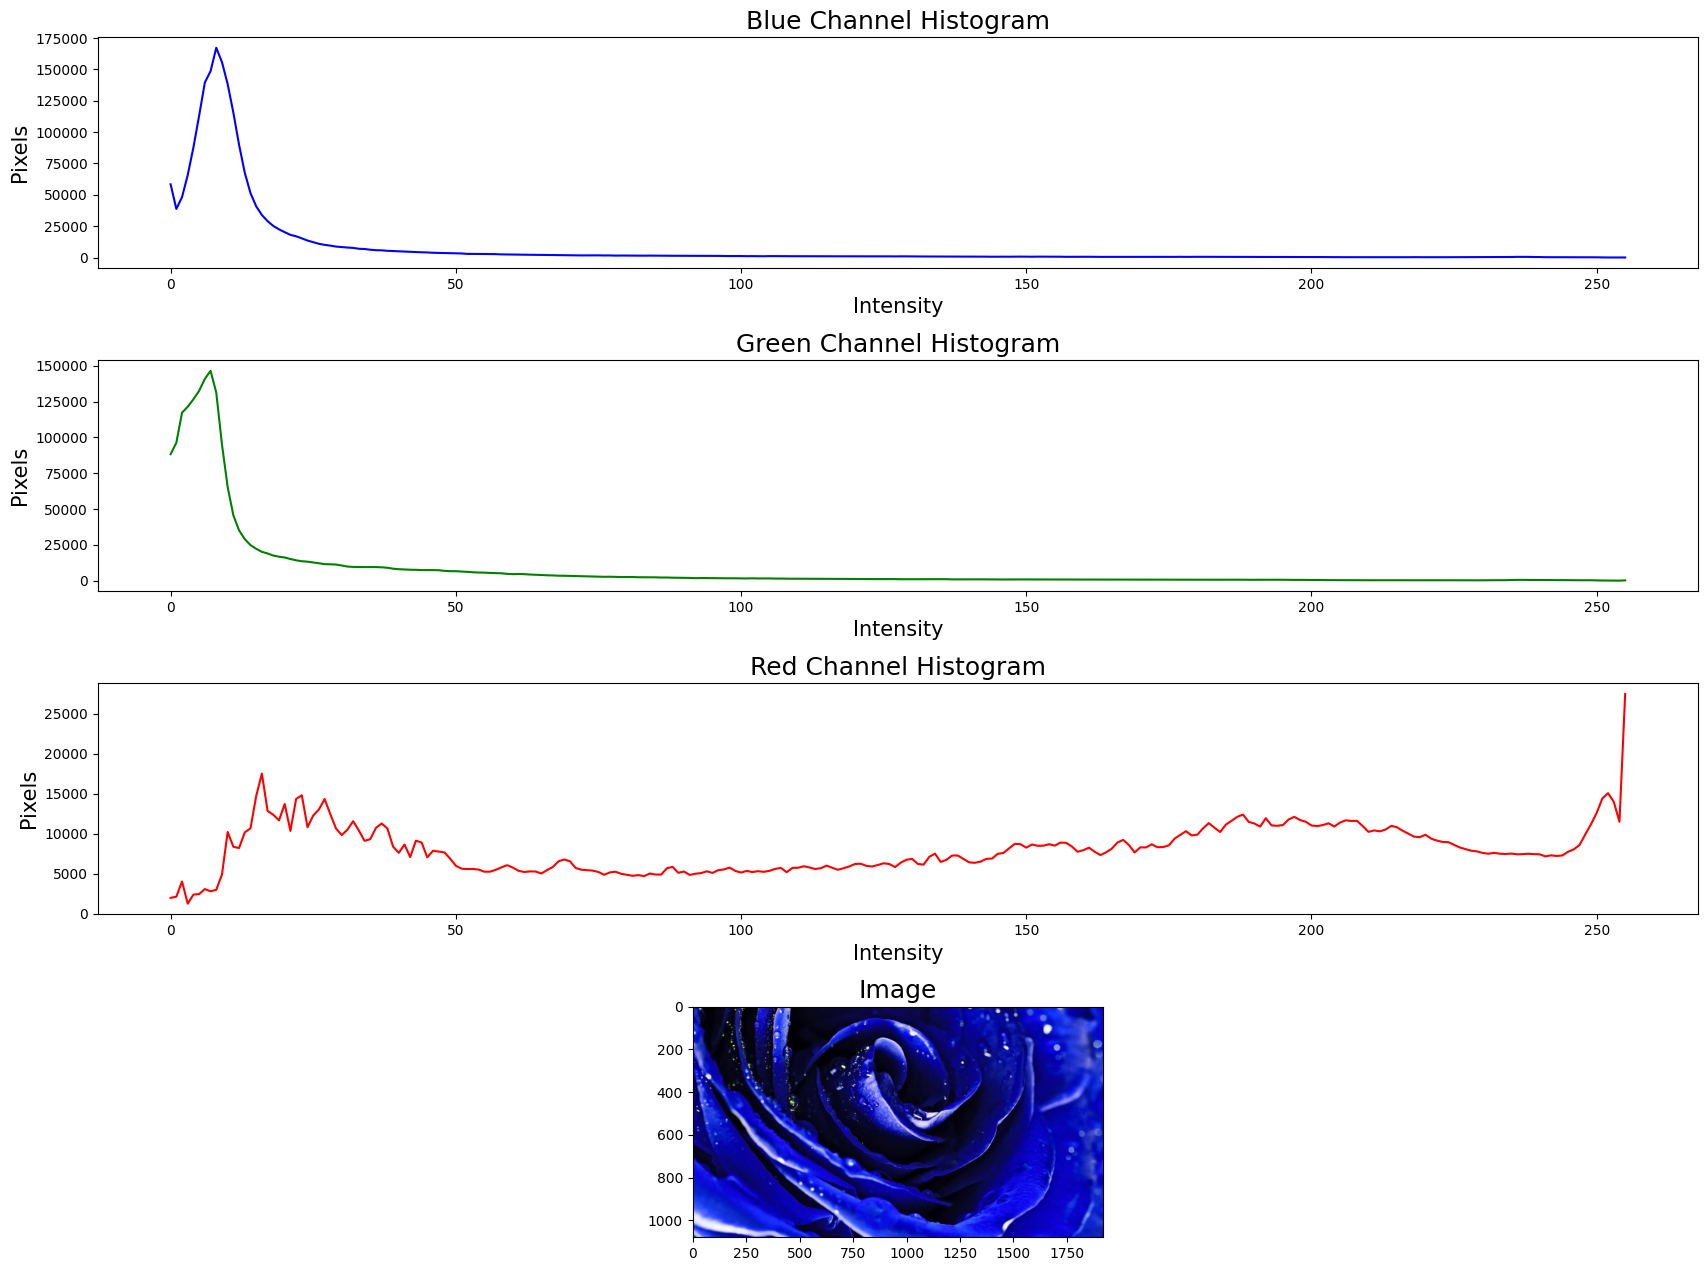

In [26]:
hists, image = get_gists(df, 0)

fig = plt.figure(figsize=(20, 15))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

fig.add_subplot(4, 1, 1)
plt.title('Blue Channel Histogram', fontsize = 18)
plt.plot(hists[0], color = 'b')
plt.xlabel('Intensity', fontsize = 15)
plt.ylabel('Pixels', fontsize = 15)

fig.add_subplot(4, 1, 2)
plt.title('Green Channel Histogram', fontsize = 18)
plt.plot(hists[1], color = 'g')
plt.xlabel('Intensity', fontsize = 15)
plt.ylabel('Pixels', fontsize = 15)

fig.add_subplot(4, 1, 3)
plt.title('Red Channel Histogram', fontsize = 18)
plt.plot(hists[2], color = 'r')
plt.xlabel('Intensity', fontsize = 15)
plt.ylabel('Pixels', fontsize = 15)

fig.add_subplot(4, 1, 4)
plt.title('Image',  fontsize = 18)
plt.imshow(image)

plt.show()